# Lecture 2 
## K Nearest Neighbors regression

K nearest neighbor provides functionality for unsupervised and supervised neighbors-based learning methods.

Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

$k$-nearest neighbor model selection with a validation set
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html


In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns


In [2]:
np.random.seed(66)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

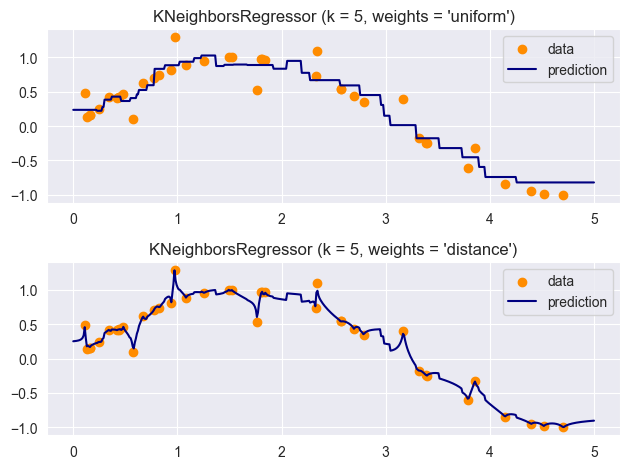

In [3]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()



## K Nearest Neighbors classification

## Spirals

$$
\begin{aligned}
r&\sim \operatorname{Unif}(0, k\pi)\\
y&\sim \operatorname{Bernoulli}(\tfrac12)\\
\theta|r, y=0&\sim N(\sqrt{r}, \sigma^2)\\
\theta|r, y=1&\sim N(\sqrt{r} + \pi, \sigma^2)\\
x &= (\sqrt{r}\cos\theta, \sqrt{r}\sin\theta)
\end{aligned}
$$

In [3]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib
import numpy as np


In [5]:
def make_spirals(k=20, s=1.0, n=2000):
    X = np.zeros((n, 2))
    y = np.round(np.random.uniform(size=n)).astype(int)
    r = np.random.uniform(size=n)*k*np.pi
    rr = r**0.5
    theta = rr + np.random.normal(loc=0, scale=s, size=n)
    theta[y == 1] = theta[y == 1] + np.pi
    X[:,0] = rr*np.cos(theta)
    X[:,1] = rr*np.sin(theta)
    return X, y

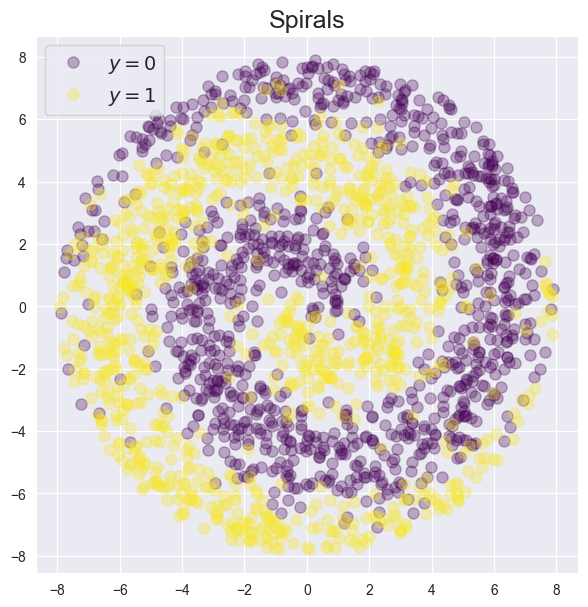

In [6]:
X, y = make_spirals()
cmap = matplotlib.cm.get_cmap("viridis")

a = cmap(0)
a = [*a[:3], 0.3]
b = cmap(0.99)
b = [*b[:3], 0.3]

plt.figure(figsize=(7,7))
ax = plt.gca()
ax.set_aspect("equal")
ax.plot(X[y == 0, 0], X[y == 0, 1], 'o', color=a, ms=8, label="$y=0$")
ax.plot(X[y == 1, 0], X[y == 1, 1], 'o', color=b, ms=8, label="$y=1$")
plt.title("Spirals", fontsize=18)
plt.legend(fontsize=14)

In [7]:
model = LogisticRegression()
model.fit(X, y)
acc = accuracy_score(y, model.predict(X))
acc

0.587

In [8]:
model = KNeighborsClassifier() # 5 nearest neighbors, by default
model.fit(X, y)
acc = accuracy_score(y, model.predict(X))
acc

0.909

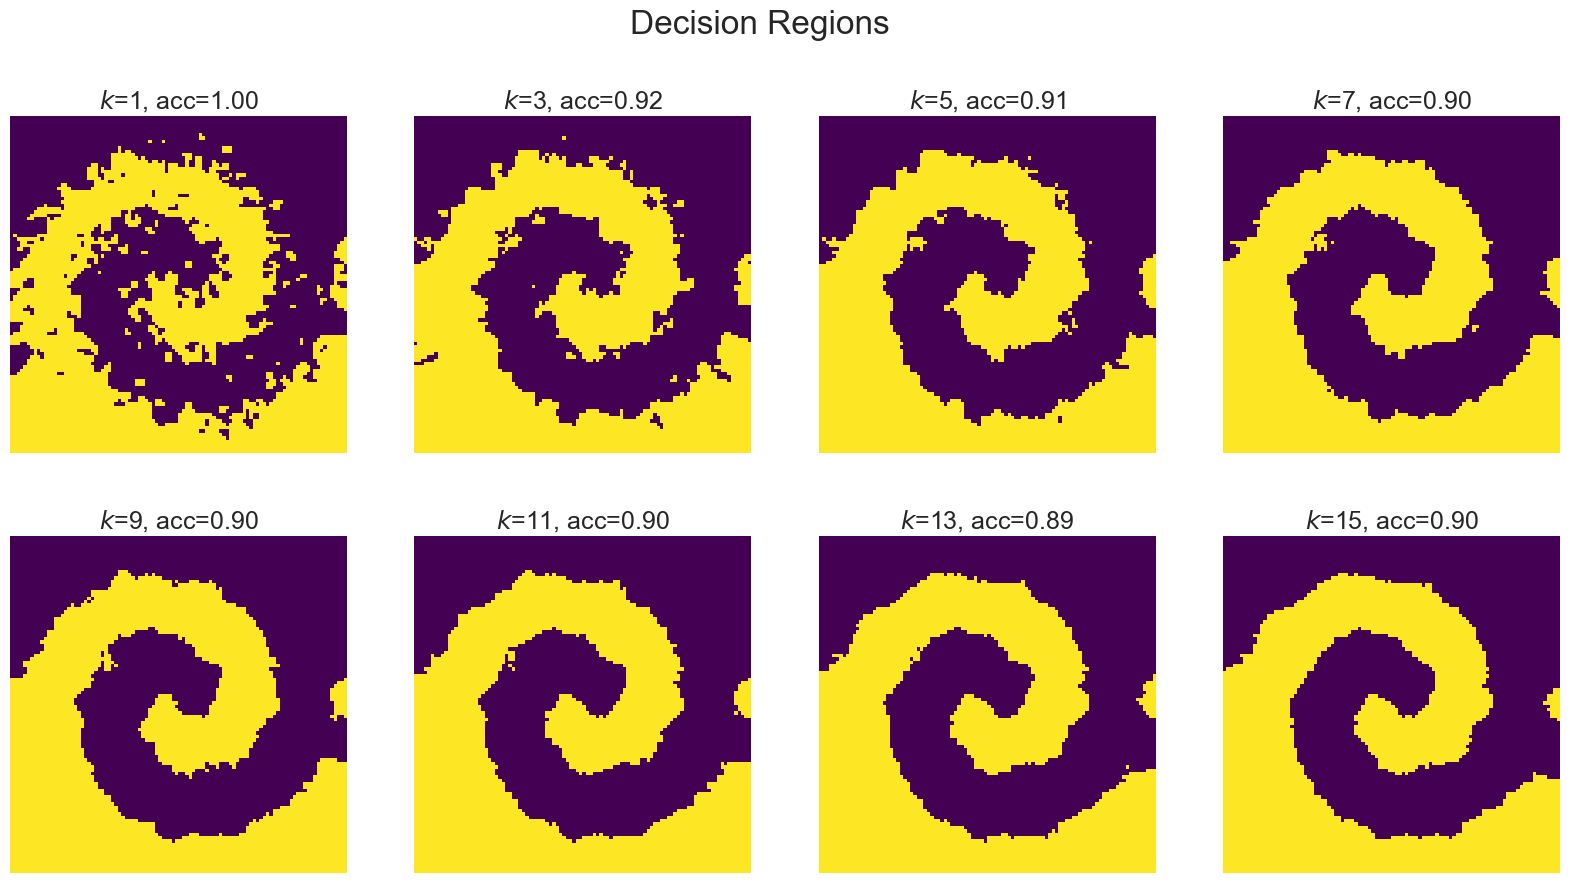

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

fig.suptitle("Decision Regions", fontsize=24)

u = np.linspace(-8, 8, 100)
v = np.linspace(-8, 8, 100)
U, V = np.meshgrid(u, v)
UV = np.array([U.ravel(), V.ravel()]).T

ks = np.arange(1, 16, 2)

for k, ax in zip(ks, axes.ravel()):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X, y)
  acc = accuracy_score(y, model.predict(X))
  W = model.predict(UV).reshape(U.shape)
  ax.imshow(W, origin="lower", cmap=cmap)
  ax.set_axis_off()
  ax.set_title(f"$k$={k}, acc={acc:.2f}", fontsize=18)

In [10]:
X_tr, y_tr = make_spirals()
X_val, y_val = make_spirals()

ks = np.arange(1, 101, 2)
accs_tr = []
accs_val = []
for k in ks:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_tr, y_tr)
  acc_tr = accuracy_score(y_tr, model.predict(X_tr))
  acc_val = accuracy_score(y_val, model.predict(X_val))
  accs_tr.append(acc_tr)
  accs_val.append(acc_val)

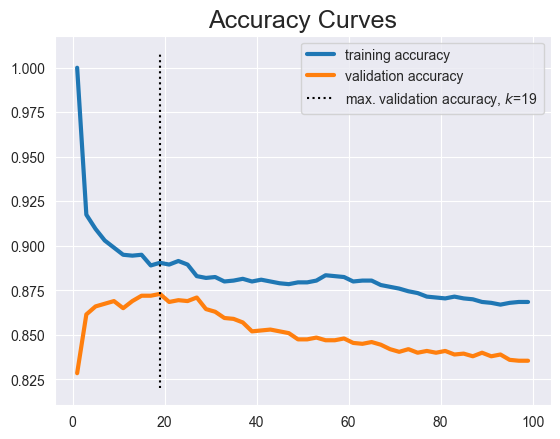

In [11]:
k = ks[np.argmax(accs_val)]
plt.plot(ks, accs_tr, label="training accuracy", lw=3)
plt.plot(ks, accs_val, label="validation accuracy", lw=3)
plt.vlines(k, *plt.ylim(), colors="k", linestyles=":", label=f"max. validation accuracy, $k$={k}")
plt.title("Accuracy Curves", fontsize=18)
plt.legend()

(2000, 2) (500, 2) (2000,) (500,)


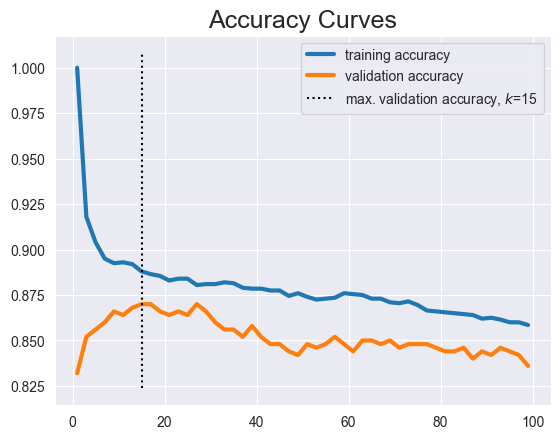

In [12]:
X, y = make_spirals(n=2500)

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape);

ks = np.arange(1, 101, 2)
accs_tr = []
accs_val = []
for k in ks:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_tr, y_tr)
  acc_tr = accuracy_score(y_tr, model.predict(X_tr))
  acc_val = accuracy_score(y_val, model.predict(X_val))
  accs_tr.append(acc_tr)
  accs_val.append(acc_val)

k = ks[np.argmax(accs_val)]
plt.plot(ks, accs_tr, label="training accuracy", lw=3)
plt.plot(ks, accs_val, label="validation accuracy", lw=3)
plt.vlines(k, *plt.ylim(), colors="k", linestyles=":", label=f"max. validation accuracy, $k$={k}")
plt.title("Accuracy Curves", fontsize=18)
plt.legend()

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm

In [ ]:
def make_data(n=None, s=0.15, random_state=666):
    np.random.seed(random_state)
    X = 2.5*np.random.uniform(size=(n, 2)) - 1.25
    y = 1*(X[:,1]**2 - 3*(X[:,0]**3 + X[:,0]**2) + s*np.random.normal(size=n) > 0)
    return X, y



In [ ]:
X, y = make_data(n=400)
print(X.shape)
print( y.shape);
print(min(X[:,0]), max(X[:,0]))
print(min(X[:,1]), max(X[:,1]))

In [ ]:
#Set is a collection which is unordered, unchangeable*, and unindexed. No duplicate members. Sets are written with curly brackets.
set(y)

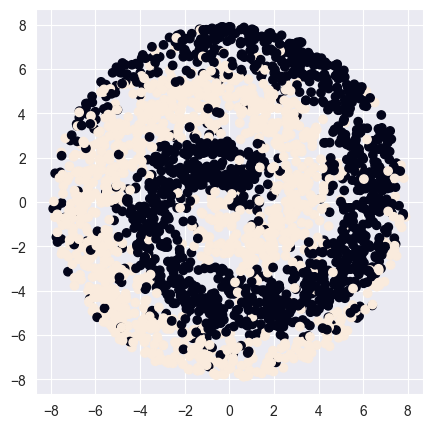

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(*X.T, c=y)

In [15]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape);

(2000, 2) (500, 2) (2000,) (500,)


In [16]:
def make_decision_regions(x=None, y=None, model=None):
    X, Y = np.meshgrid(x, y)
    XY = np.array([X.ravel(), Y.ravel()]).T #numpy.ravel() Return a contiguous flattened array.
    assert XY.shape == (len(x)*len(y), 2)
    Z = model.predict(XY).reshape(X.shape)
    return X, Y, Z


In [17]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
acc_tr = accuracy_score(y_tr, model.predict(X_tr))
acc_te = accuracy_score(y_te, model.predict(X_te))
print(acc_tr, acc_te)

0.6045 0.582


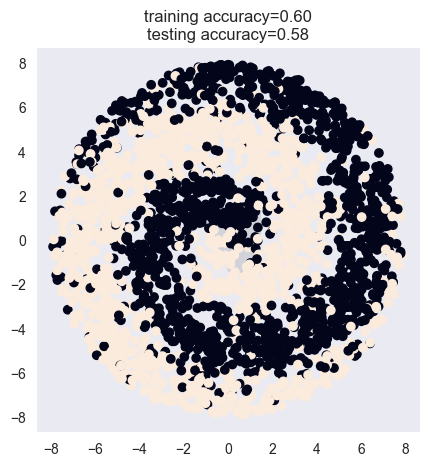

In [18]:
U, V, W = make_decision_regions(x=np.linspace(-1.5, 1.5, 200), y=np.linspace(-1.5, 1.5, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca() #Get the current Axes.
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
ax.scatter(*X.T, c=y)
ax.set_aspect("equal")
ax.set_title(f"training accuracy={acc_tr:.2f}\ntesting accuracy={acc_te:.2f}")
plt.show()

Let's use a nonlinear classifier:  𝑘 -nearest neighbors:

(1600, 2) (400, 2) (1600,) (400,)
7


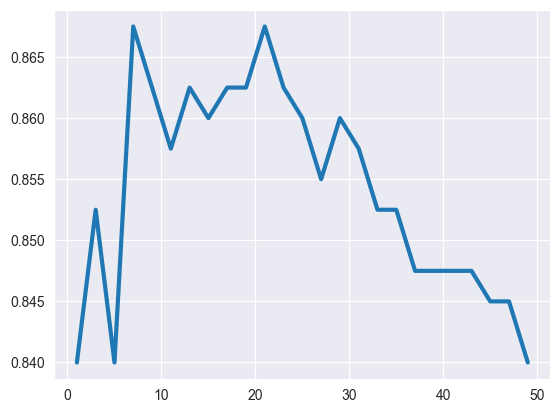

In [19]:
ks = np.arange(1, 50, 2)

# Further subdivide the training set:
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)
print(U_tr.shape, U_val.shape, v_tr.shape, v_val.shape);

accs_val = []
for k in ks:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(U_tr, v_tr)
  acc_val = accuracy_score(v_val, model.predict(U_val))
  accs_val.append(acc_val)

k = ks[np.argmax(accs_val)]
print(k)

plt.plot(ks, accs_val, lw=3)

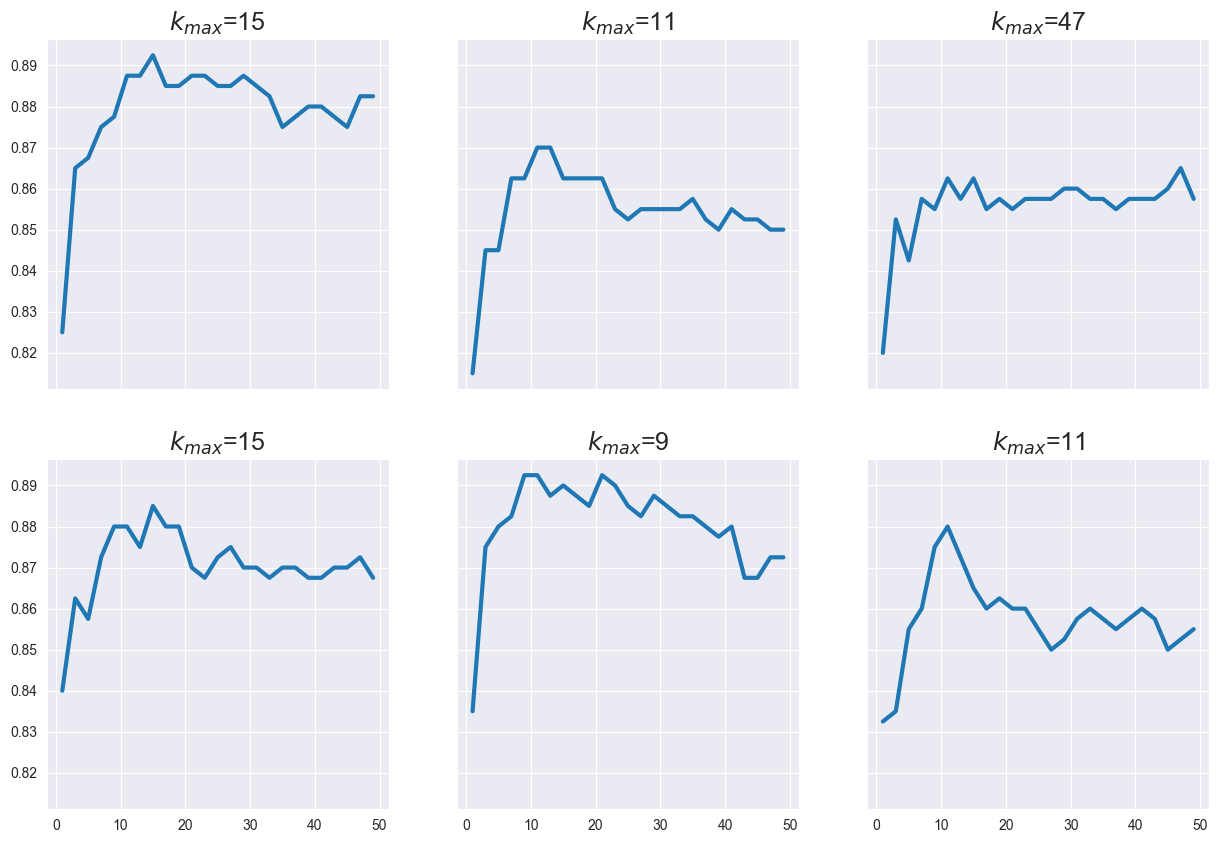

In [20]:
np.random.seed(666)

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

ks = np.arange(1, 50, 2)

for ax in axes.ravel():
    U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2)
    accs_tr = []
    accs_val = []

    for k in ks:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(U_tr, v_tr)
        acc_tr = accuracy_score(v_tr, model.predict(U_tr))
        acc_val = accuracy_score(v_val, model.predict(U_val))
        accs_tr.append(acc_tr)
        accs_val.append(acc_val)

    k = ks[np.argmax(accs_val)]

    ax.plot(ks, accs_val, lw=3)
    ax.set_title(f"$k_{{max}}$={k}", fontsize=18)


Optimal  𝑘  is highly dependent on the particular splitting of (X_tr, y_tr).

To deal with this, we average over lots of splittings!

  0%|          | 0/200 [00:00<?, ?it/s]

13


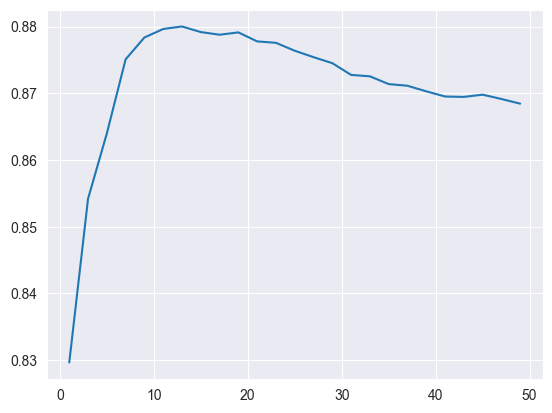

In [23]:
ks = np.arange(1, 50, 2)

n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))

for i in tqdm(range(n_repeats)):
  U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2)
  for j, k in enumerate(ks):
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(U_tr, v_tr)
      accs_val[i, j] = accuracy_score(v_val, model.predict(U_val))

scores = accs_val.mean(axis=0)
k = ks[np.argmax(scores)]
print(k)

plt.plot(ks, scores)

In [ ]:
A = np.arange(1, 10).reshape(3, 3)
print(A)
A.mean(axis=0) # collapses rows

In [ ]:
A.mean(axis=1) # collapses columns

In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_tr, y_tr)
acc_tr = accuracy_score(y_tr, model.predict(X_tr))
acc_te = accuracy_score(y_te, model.predict(X_te))
print(acc_tr, acc_te)

U, V, W = make_decision_regions(x=np.linspace(-1.5, 1.5, 200), y=np.linspace(-1.5, 1.5, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
ax.scatter(*X.T, c=y)
ax.set_aspect("equal")
ax.set_title(f"$k$={k}\ntraining accuracy={acc_tr:.2f}\ntesting accuracy={acc_te:.2f}")
plt.show()

Alternatively, we can use cross-validation:

In [ ]:
ks = np.arange(1, 50, 2)
cv = 5
scores = np.zeros((cv, len(ks)))
for j, k in enumerate(ks):
  model = KNeighborsClassifier(n_neighbors=k)
  scores[:,j] = cross_val_score(model, X_tr, y_tr, cv=cv, scoring="accuracy")

In [ ]:
scores.shape
# (i,j) entry is the accuracy of the model with n_neighbors=ks[j] on the i-th fold

In [ ]:
plt.plot(ks, scores.mean(axis=0))

In [ ]:
k = ks[scores.mean(axis=0).argmax()]
print(k);

More averaging will give a smoother curve: Use repeated  𝑘 -fold cross validation:

In [ ]:
ks = np.arange(1, 50, 2)

n_splits = 5
n_repeats = 40
accs_val = np.zeros((n_splits*n_repeats, len(ks)))

for j, k in enumerate(tqdm(ks)):
  rkcv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=666)
  splits = rkcv.split(X_tr, y_tr)
  for i, (I_tr, I_val) in enumerate(splits):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_tr[I_tr], y_tr[I_tr])
    accs_val[i, j] = accuracy_score(y_tr[I_val], model.predict(X_tr[I_val]))

scores = accs_val.mean(axis=0)
k = ks[scores.argmax()]
print(k)
plt.plot(ks, scores)